#### **Quadratic Equation Workflow**

ax2 + bx + c = 0

D = b2 - 4ac 

Nature of Roots <br> 
- D = 0 (equal roots) <br>
- D > 0 (2 real roots) <br>
- D < 0 (2 imaginary roots)

**How the Flow looks like** <br>
- START -> Define (a, b, c) -> PRINT quadratic equation -> Calculate discriminant -> Choose a conditional path -> END

In [37]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal 

In [45]:
class EquationState(TypedDict):
    """ 
    Keeps the state of equation a, b, c, D, and roots alpha, beta
    """
    a: float
    b: float 
    c: float 
    D: float 
    alpha: str
    beta: str

In [46]:
def print_equation(state: EquationState) -> EquationState:
    print(f"{state['a']}x2 + {state['b']}x + {state['c']}")
    return state
    
def calculate_discriminant(state: EquationState) -> EquationState:
    D = (state['b']**2 - (4*state['a']*state['c']))
    state['D'] = D 
    return state 

def get_real_roots(state: EquationState) -> EquationState:
    state['alpha'] = str((-1*state['b'] + (state['D']**0.5))/(2*state['a']))
    state['beta'] = str((-1*state['b'] - (state['D']**0.5))/(2*state['a']))
    return state 

def get_equal_roots(state: EquationState) -> EquationState:
    state['alpha'] = str((-1*state['b'])/(2*state['a']))
    state['beta'] = str((-1*state['b'])/(2*state['a']))
    return state 

def get_imaginary_roots(state: EquationState) -> EquationState:
    state['alpha'] = f"({-1*state['b']} - i{(-1*state['D'])**0.5})/({2*state['a']})"
    state['beta'] = f"({-1*state['b']} + i{(-1*state['D'])**0.5})/({2*state['a']})"
    return state 


## condition checking function (should route to these functions) Literal makes sure one of these listed strings to be returned
def check_condition(state: EquationState) -> Literal["real_roots", "equal_roots", "imaginary_roots"]:
    if state['D'] > 0:
        return "real_roots"
    elif state['D'] == 0:
        return "equal_roots"
    else:
        return "imaginary_roots"

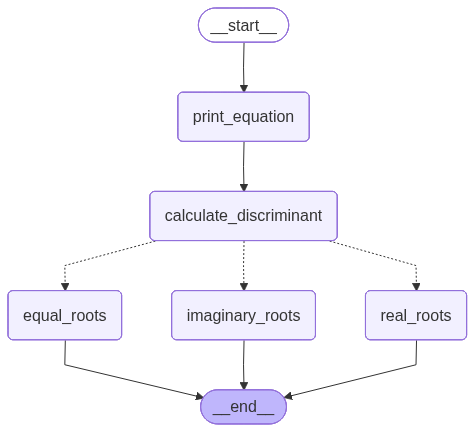

In [47]:
graph = StateGraph(EquationState)

# add nodes 
graph.add_node('print_equation', print_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', get_real_roots)
graph.add_node('equal_roots', get_equal_roots)
graph.add_node('imaginary_roots', get_imaginary_roots)

# add edges 
graph.add_edge(START, 'print_equation')
graph.add_edge('print_equation', 'calculate_discriminant')

# create conditional edge
graph.add_conditional_edges('calculate_discriminant', check_condition)

graph.add_edge('real_roots', END)
graph.add_edge('equal_roots', END)
graph.add_edge('imaginary_roots', END)
# compile graph 
quadratic_eqn_solver = graph.compile()

# display graph 
from IPython.display import Image 
Image(quadratic_eqn_solver.get_graph().draw_mermaid_png())

In [48]:
input_state = {'a' : 5 , 'b' : 6, 'c' : 7}
output_state = quadratic_eqn_solver.invoke(input_state)

5x2 + 6x + 7


In [49]:
print(output_state)

{'a': 5, 'b': 6, 'c': 7, 'D': -104, 'alpha': '(-6 - i10.198039027185569)/(10)', 'beta': '(-6 + i10.198039027185569)/(10)'}


In [50]:
from pprint import pprint 
pprint(output_state)

{'D': -104,
 'a': 5,
 'alpha': '(-6 - i10.198039027185569)/(10)',
 'b': 6,
 'beta': '(-6 + i10.198039027185569)/(10)',
 'c': 7}
